In [1]:
import numpy as np

In [2]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
true = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [3]:
def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

In [4]:
mean_squared_error(np.array(y), np.array(true))

0.09750000000000003

In [6]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
mean_squared_error(np.array(y), np.array(true))

0.5975

In [7]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

In [8]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
true = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [9]:
cross_entropy_error(np.array(y), np.array(true))

0.510825457099338

In [10]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(true))

2.302584092994546

In [11]:
import sys, os
sys.path.append("./dataset")
import numpy as np
import pickle
from mnist import load_mnist
import matplotlib.pylab as plt

In [12]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize = true, one_hot_label = True)
print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [20]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [21]:
np.random.choice(60000, 10)

array([40507, 26991,  5778,  2352, 42457, 25833, 11780, 59067, 59242,
       11321])

In [23]:
def cross_entropy_error_one_hot(y, t):
    if y.ndim ==1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y)) / batch_size

In [24]:
def cross_entropy_error_label(y, t):
    if y.ndim ==1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size

In [25]:
def numerical_differential(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)

In [26]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

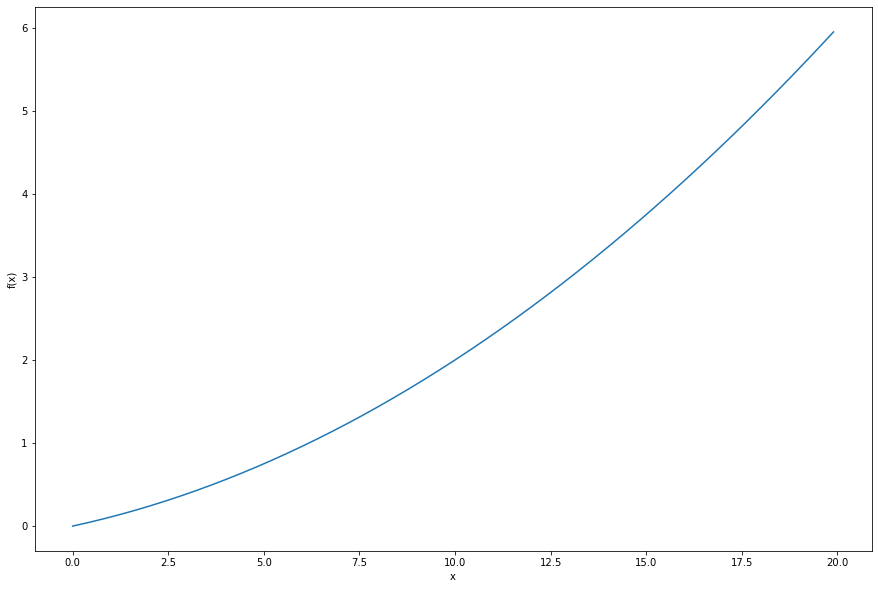

In [27]:
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.figure(figsize = (15, 10))
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [29]:
numerical_differential(function_1, 5)

0.1999999999990898

In [30]:
numerical_differential(function_1, 10)

0.2999999999986347

In [32]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    for index in range(x.size):
        tmp_val = x[index]
        x[index] = tmp_val + h
        fxh1 = f(x)
        
        x[index] = tmp_val - h
        fxh2 = f(x)
        
        grad[index] = (fxh1 - fxh2) / (2*h)
        x[index] = tmp_val
        
    return grad

In [33]:
def gradient_descent(f, init_x, lr=0.01, step_num = 100):
    x = init_x
    x_history = []
    
    for i in range(step_num):
        x_history.append(x.copy())
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x, np.array(x_history)

In [34]:
def function_2(x):
    return x[0]**2 + x[1]**2

In [36]:
init_x = np.array([-3.0, 4.0])
lr = 0.1
step_num = 100
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num = step_num)
print(x)

[-6.11110793e-10  8.14814391e-10]


In [37]:
import sys, os
import numpy as np

In [65]:
def softmax(matrix):
    maximum_of_matrix = np.max(matrix)
    difference_from_maximum = matrix - maximum_of_matrix
    exponential_of_difference = np.exp(difference_from_maximum)
    sum_of_exponential = np.sum(exponential_of_difference)
    y = exponential_of_difference / sum_of_exponential
    return y

def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
        x[idx] = tmp_val - h
        fxh2 = f(x)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val
        it.iternext()
        
    return grad

In [66]:
class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3)
        
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        
        return loss

In [67]:
net = simpleNet()
print(net.W)

[[-0.49829102 -0.31343498 -0.45918096]
 [ 0.12277225  0.43077594 -0.14103044]]


In [68]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

[-0.18847959  0.19963736 -0.40243597]


In [69]:
np.argmax(p)

1

In [70]:
t = np.array([0, 0, 1])
net.loss(x, t)

1.4022827543727179

In [71]:
def f(W):
    return net.loss(x, t)

In [72]:
dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.18283836  0.26954071 -0.45237906]
 [ 0.27425754  0.40431106 -0.6785686 ]]


In [73]:
f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.18283836  0.26954071 -0.45237906]
 [ 0.27425754  0.40431106 -0.6785686 ]]


In [145]:
import sys, os
sys.path.append("./dataset")
import numpy as np
import pickle
from mnist import load_mnist
import matplotlib.pylab as plt

In [146]:
def step_function(x):
    return np.arrar(x > 0, dtype=np.int)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def relu(x):
    return np.maximum(0, x)
def sigmoid_grad(x):
    return (1.9 - sigmoid(x)) * sigmoid(x)
def step_function(x):
    return np.array(x > 0, dtype=np.int)
def relu_grad(x):
    grad = np.zeros(x)
    grad[x>=0] = 1
    return grad
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T
    x = x - np.max(x)
    return np.exp(x) / np.sum(np.exp(x))
def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    if t.size == y.size:
        t = t.argmax(axis=1)
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size
def softmax_loss(X, t):
    y = softmax(X)
    return cross_entropy_error(y, t)
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        x[idx] = tmp_val - h
        fxh2 = f(x)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
        it.iternext()
    return grad

In [147]:
class TwoLayerNet:
    
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        
    def predict(self, x):
        #
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        return y
    
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
    
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
    
        batch_num = x.shape[0]
    
        #
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
    
        #
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
    
        dz1 = np.dot(dy, W2.T)
        da1 = sigmoid_grad(a1) * dz1
        grads['W1'] = np.dot(x.T, da1)
        grads['b1'] = np.sum(da1, axis=0)
    
        return grads

In [148]:
net = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

In [149]:
print(net.params["W1"].shape)
print(net.params["b1"].shape)
print(net.params["W2"].shape)
print(net.params["b2"].shape)

(784, 50)
(50,)
(50, 10)
(10,)


In [150]:
x = np.random.rand(100, 784)
y = net.predict(x)

In [151]:
x = np.random.rand(100, 784)
t = np.random.rand(100, 10)
#
grads = net.numerical_gradient(x, t)

In [152]:
print(grads["W1"].shape)
print(grads["b1"].shape)
print(grads["W2"].shape)
print(grads["b2"].shape)

(784, 50)
(50,)
(50, 10)
(10,)


In [153]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

In [154]:
train_loss_list = []

In [155]:
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1
iter_per_epoch = max(train_size / batch_size, 1)

In [156]:
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

In [157]:
for i in range(iters_num):
    #
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    #
    grad = network.gradient(x_batch, t_batch)
    
    #
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
        
    #
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    #
    if i % iter_per_epoch == 0:
        print("loss: " + str(loss))

loss: 2.299020607097024
loss: 0.9275689034306016
loss: 0.8866826566561915
loss: 0.6231708110793087
loss: 0.457143241847266
loss: 0.42164492077182486
loss: 0.5037895540742293
loss: 0.3596477844236778
loss: 0.54675260997192
loss: 0.4782167372361122
loss: 0.4163338541031901
loss: 0.3275469689777424
loss: 0.4755051050491336
loss: 0.35570110432201346
loss: 0.4827241239244325
loss: 0.35645986680238806
loss: 0.4153002777149385


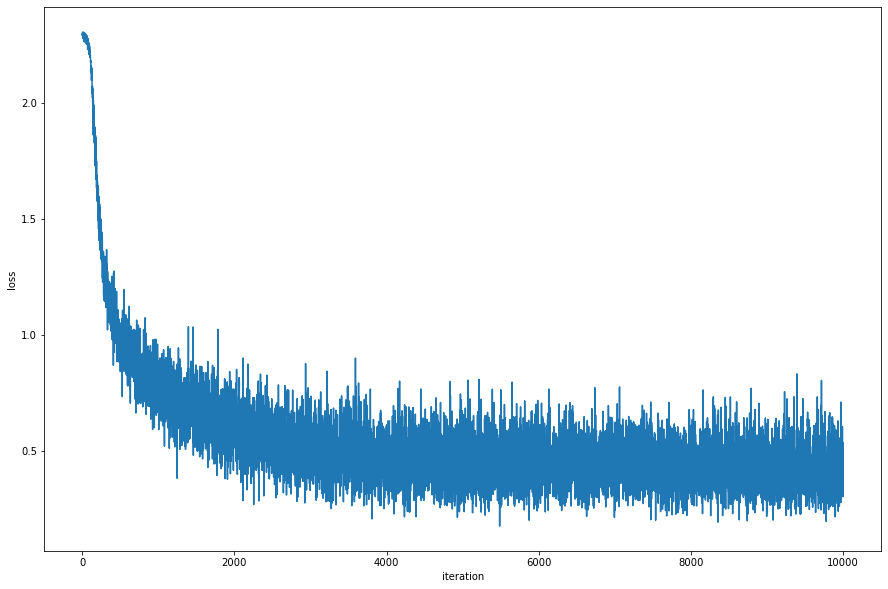

In [158]:
x = np.arange(len(train_loss_list))

plt.figure(figsize = (15, 10))
plt.plot(x, train_loss_list, label='train acc')
plt.xlabel("iteration")
plt.ylabel("loss")
plt.show()

In [159]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

In [160]:
train_loss_list = []
train_acc_list = []
test_acc_list = []

In [161]:
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1
iter_per_epoch = max(train_size / batch_size, 1)

In [162]:
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

In [163]:
for i in range(iters_num):
    #
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    #
    grad = network.gradient(x_batch, t_batch)
    
    #
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
        
    #
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    #
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("loss: " + str(loss) + ", train acc: " + str(train_acc) + ", test acc: " + str(test_acc))

loss: 2.2984150564400307, train acc: 0.09913333333333334, test acc: 0.1009
loss: 1.030608529958839, train acc: 0.74345, test acc: 0.7431
loss: 0.7463206876590311, train acc: 0.7829, test acc: 0.7921
loss: 0.6475370779479652, train acc: 0.8050833333333334, test acc: 0.8066
loss: 0.7244784312785868, train acc: 0.82005, test acc: 0.8231
loss: 0.7228408250231749, train acc: 0.8357166666666667, test acc: 0.8429
loss: 0.3844511486546472, train acc: 0.8446833333333333, test acc: 0.8525
loss: 0.5461377377931897, train acc: 0.8509, test acc: 0.8606
loss: 0.36381931984567745, train acc: 0.8548, test acc: 0.8612
loss: 0.7541564965340658, train acc: 0.8612166666666666, test acc: 0.8685
loss: 0.40474688734824854, train acc: 0.8651, test acc: 0.8706
loss: 0.6364759531240717, train acc: 0.8651833333333333, test acc: 0.8718
loss: 0.35502495975522363, train acc: 0.8633833333333333, test acc: 0.8643
loss: 0.4046660882277349, train acc: 0.8697833333333334, test acc: 0.8675
loss: 0.6210599454167655, train

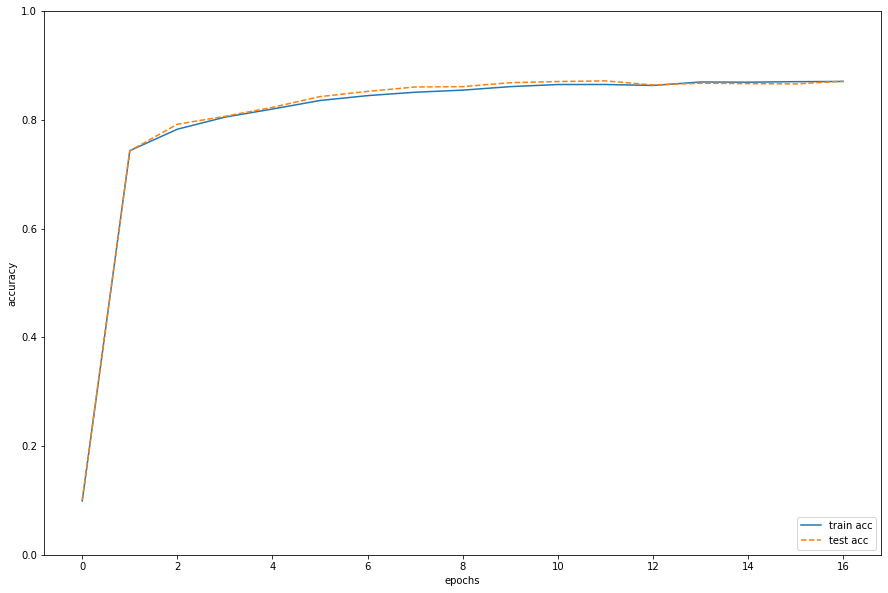

In [164]:
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))

plt.figure(figsize = (15, 10))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()